<a href="https://colab.research.google.com/github/hectoresc/MineriaDeDatos/blob/main/Avance1_PIA_Equipo_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Equipo 8**
###**Grupo 001 Lunes 7:00pm-10:00pm**
**Integrantes:**

  Andrea Sarahi Gómez Ávila 2034174

  Joshune Juditht Arriaga Gómez 1853668

  Héctor Eleazar Escobedo 1745909

  Daniel Jair Martinez Ávila 1872137

**Base de datos:** Bitcoin Historical Data

URL:https://www.kaggle.com/mczielinski/bitcoin-historical-data

**Introducción**

El bitcoin es una moneda virtual que, como cualquier otra, puede ser utilizada para el intercambio de productos o servicios. La diferencia con las divisas tradicionales del resto del mundo —como el dólar o el peso— es que no está a expensas de un banco central, no depende de ninguna autoridad financiera, y no existe físicamente.

**Descripción de datos**

a) ¿Qué tipo de datos son?

Los datos que se trabajaran son los precios de apertura, cierre, volumen del precio del la moneda virtual bitcoin durante enero del 2012 a marzo del 2021.

b) Descripción de las columnas.

Las columnas contienen el tiempo en unidad Unix, el precio de apertura, cierre, el precio maximo, el precio minimo y el volumen.

**Justificación del uso de datos**

a)Saber un poco más de como ha sido el bitcoin en el comercio, cuál ha sido su desarrollo con el paso del tiempo,quú tan frecuentes son ss cambios. 

b)Conocer la función de una nueva moneda.

**Objetivo Final**

Predecir el precio del bitcoin mediante un modelo de mayor precisión.

**Objetivo secundario**

Identificar las posibles causas en las que el valor del bitcoin entro en recesión.

**Preguntas de interés**

a) ¿Qué impacto ha tenido el bitcoin desde su lanzamiento?

b) ¿Cómo funciona el bitcoin en el comercio?

**Limpieza de datos**

* Importar librerías

In [ ]:
import pandas as pd
import seaborn as sns
from datetime import datetime

* Importar datos

In [ ]:
btc = pd.read_csv("bitcoin_historical.csv")
btc.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Cambiar nombres de columnas

Se convierten a minúsculas los nombres y se agregan "_" en lugar de espacios para trabajar de una forma más eficiente

In [ ]:
ls = []
for i in btc.columns:
  ls.append(i.lower().replace(" ", "_"))
ls
btc.columns = ls
btc.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume_(btc)',
       'volume_(currency)', 'weighted_price'],
      dtype='object')

Se usa btc.info para identificar de manera rápida el tipo de datos que tenemos, las columnas y filas que tenemos y la memoria que usa nuestra base de datos.

In [ ]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   timestamp          int64  
 1   open               float64
 2   high               float64
 3   low                float64
 4   close              float64
 5   volume_(btc)       float64
 6   volume_(currency)  float64
 7   weighted_price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


* Valores nulos

Con la librería seaborn, creamos un gráfico que nos permita entender como se comportan los missing values, se ven muchos más puntos vacíos al inicio de nuestra serie, esto es entendible pues en esos momentos bitcoin no era una moneda tan popular como lo es ahora, sin embargo, como sabemos que noestros datos de timestamp están en segundos, puede que esto no nos afecte demasiado.

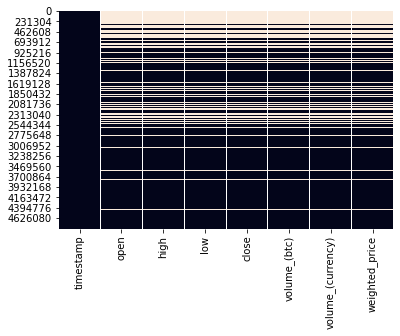

In [ ]:
sns.heatmap(btc.isnull(), cbar=False)

Para futuros proyectos o modelos que queramos realizar, es más práctico tener los datos en una serie de tiempo, para hacer esto, convertiremos nuestra timestamp unix a una en segundos

In [ ]:
btc.timestamp = pd.to_datetime(btc.timestamp, unit='s')

In [ ]:
btc.head()

,timestamp,open,high,low,close,volume_(btc),volume_(currency),weighted_price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


Ya convertidos a segundos nuestros datos, nos damos cuenta que debido a los valores nulos, no será posible trabajarlos como una serie de tiempo, para hacer esto, podemos obtener los datos de un forma díaria, agrupando los datos en día y haciendo el promedio en las columnas para obtener valores consistentes.

In [ ]:
btc.index = btc.timestamp
btc = btc.resample('D').mean()
btc.reset_index()

,timestamp,open,high,low,close,volume_(btc),volume_(currency),weighted_price
0,2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
1,2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2,2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
3,2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
4,2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159
...,...,...,...,...,...,...,...,...
3374,2021-03-27,55193.240643,55219.665031,55168.757372,55195.415367,1.823877,100884.732367,55193.357260
3375,2021-03-28,55833.608471,55857.735342,55810.425126,55835.012863,1.447939,80632.115263,55832.958824
3376,2021-03-29,56914.886595,56946.213593,56885.242967,56915.629993,3.732887,213754.555988,56913.993819
3377,2021-03-30,58347.805624,58371.955310,58323.956690,58349.357087,2.363999,138231.241926,58346.912268


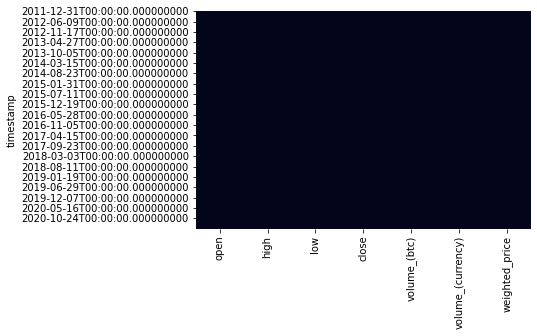

In [ ]:
sns.heatmap(btc.isnull(), cbar=False)

Viendo un gráfico nos damos cuenta que realizando el procedimiento anterior, por día no tenemos valores nulos, por lo cuál ya es una serie de tiempo útil.

# **Base de datos películas**

**Base de datos:** Películas en Netflix, Prime Video, Hulu y Disney+

URL:https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney?fbclid=IwAR1yx_cLqHlzHPuce5Y7UOJEGHoP2LcAuOwlYJw2HdliWHlo-ij5YosNeiM

**Introducción**

a)	El streaming es un tipo de tecnología multimedia que envía contenidos de vídeo y audio a su dispositivo conectado a Internet. Esto le permite acceder a contenidos (TV, películas, música, pódcast) en cualquier momento que lo desee, en un PC o un móvil, sin someterse a los horarios del proveedor.

**Descripción de datos**

a) ¿Qué tipo de datos son?

Los datos que se trabajaran son las peliculas recomendas y clasificadas por edad de quien da la recomendacion.

b) Descripción de las columnas.

 -Titulo: Nombre en inglés del titulo de la pelicula 
 
 -Grupo de edad: Entero, número único asignado para el grupo de edad al cual va dedicada la pelicula 
 
 -Año en que se produjo:entero, numero que dice en que año se produjo la pelicula 
 
 -IMDb rating: Flotante, valor con el cual se le califica a la película según IMDb 
 
 -Rotten tomatoes: Flotante, valor con el cual se le califica a la película según Rotten Tomatoes

**Justificación del uso de datos**

a)En la base de datos participa IMDb y ellos son la base de datos mas grande del mundo, entonces teníamos muchas opciones para hablar de las películas, ya que la mayoría de la información la podiamos encontrar ahí. 

b)Tener una comparación de plataformas de streaming.

**Objetivo Final**

Tener un comparador de plataformas de streamig de acuerdo a la ponderación de IMDb.

**Objetivo secundario**

...

**Preguntas de interés**

a) ¿Qué influencia tendría una base de datos en la decisión de un cliente para la contratación de una plataforma de video?

b) ¿Cómo les podría servir la base de datos a usuarios que están escogiendo una plataforma de video?

**Limpieza de datos**

* Importar la base de datos

In [ ]:
mvs = pd.read_csv("movies_streaming.csv")
mvs.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


Se usa mvs.info para identificar de manera rápida el tipo de datos que tenemos, las columnas y filas que tenemos y la memoria que usa nuestra base de datos.

In [ ]:
mvs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unnamed:_0       9515 non-null   int64  
 1   id               9515 non-null   int64  
 2   title            9515 non-null   object 
 3   year             9515 non-null   int64  
 4   age              5338 non-null   object 
 5   imdb             9309 non-null   object 
 6   rotten_tomatoes  9508 non-null   object 
 7   netflix          9515 non-null   int64  
 8   hulu             9515 non-null   int64  
 9   prime_video      9515 non-null   int64  
 10  disney+          9515 non-null   int64  
 11  type             9515 non-null   int64  
 12  directors        9104 non-null   object 
 13  genres           9399 non-null   object 
 14  country          9261 non-null   object 
 15  language         9202 non-null   object 
 16  runtime          9196 non-null   float64
dtypes: float64(1),

* Nombres de columnas

Se convierten a minúsculas los nombres y se agregan "_" en lugar de espacios para trabajar de una forma más eficiente

In [ ]:
ls = []
for i in mvs.columns:
  ls.append(i.lower().replace(" ", "_"))
ls
mvs.columns = ls
mvs.columns

Index(['unnamed:_0', 'id', 'title', 'year', 'age', 'imdb', 'rotten_tomatoes',
       'netflix', 'hulu', 'prime_video', 'disney+', 'type', 'directors',
       'genres', 'country', 'language', 'runtime'],
      dtype='object')

* Valores nulos

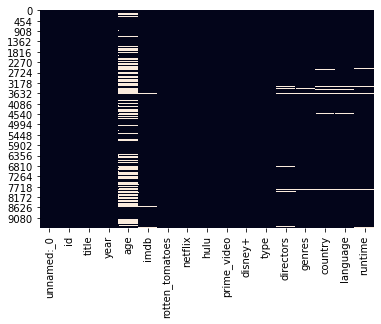

In [ ]:
sns.heatmap(mvs.isnull(), cbar=False)

Viendo el gráfico anterior, nos damos cuenta que la columna age cuenta con demasiados valores nulos, remover todas estas filas de nuestra base de datos le podría quitar poder a futuros análisis, es por eso que decidimos quitar solo esta variable.

Para las otras columnas, como no son demasiados valores nulos, removeremos estas filas de la base de datos.

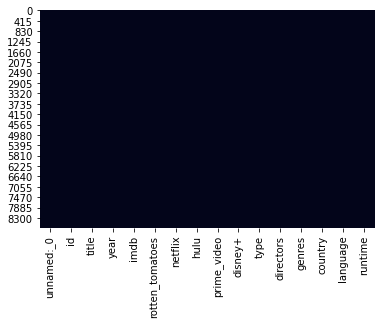

In [ ]:
mvs = mvs.drop('age', 1)
mvs = mvs.dropna()
mvs = mvs.reset_index(drop=True)
sns.heatmap(mvs.isnull(), cbar=False)

Después de hacer el procedimiento anterior, ya tenemos una base de datos limpia con la cual trabajar.

* Columnas y tipos de datos

Las columnas de id y unnamed:_0 son repetitivas y en realidad no aportan información valiosa, es por eso que las vamos a remover.

In [ ]:
mvs = mvs.drop('unnamed:_0', 1)
mvs = mvs.drop('id', 1)

Analizar los tipos de datos es importante, nos damos cuenta que muchas variables que deberían ser categóricas tienen tipo object, vamos a hacer algunos ajustes.

In [ ]:
mvs.dtypes

title               object
year                 int64
imdb                object
rotten_tomatoes     object
netflix              int64
hulu                 int64
prime_video          int64
disney+              int64
type                 int64
directors           object
genres              object
country             object
language            object
runtime            float64
dtype: object

In [ ]:
mvs["netflix"] = mvs["netflix"].astype('category')
mvs["hulu"] = mvs["hulu"].astype('category')
mvs["prime_video"] = mvs["prime_video"].astype('category')
mvs["disney+"] = mvs["disney+"].astype('category')

In [ ]:
mvs.head()

,title,year,imdb,rotten_tomatoes,netflix,hulu,prime_video,disney+,type,directors,genres,country,language,runtime
0,The Irishman,2019,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,Dangal,2016,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,David Attenborough: A Life on Our Planet,2020,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,Lagaan: Once Upon a Time in India,2001,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,To All the Boys I've Loved Before,2018,7.1/10,94/100,1,0,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,English,99.0


Nos damos cuenta que imbd y rotten_tomatoes que son calificaciones para películas, no tienen un estándar, vamos a limpiar y estandarizar esas variables para poderlas usar en un posterior análisis, además, nos damos cuenta que la columna type no aporta información por la cual la vamos a borrar.

In [ ]:
mvs.type.unique()

array([0])

In [ ]:
mvs = mvs.drop('type', 1)

In [ ]:
mvs['imdb'] = mvs['imdb'].apply(lambda x: int(float(x[:-3])*10))

In [ ]:
mvs['rotten_tomatoes'] = mvs['rotten_tomatoes'].apply(lambda x: int(x[:-4]))

In [ ]:
mvs.head()

,title,year,imdb,rotten_tomatoes,netflix,hulu,prime_video,disney+,directors,genres,country,language,runtime
0,The Irishman,2019,78,98,1,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,Dangal,2016,84,97,1,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,David Attenborough: A Life on Our Planet,2020,90,95,1,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,Lagaan: Once Upon a Time in India,2001,81,94,1,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,To All the Boys I've Loved Before,2018,71,94,1,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,English,99.0


In [ ]:
mvs.dtypes

title                object
year                  int64
imdb                  int64
rotten_tomatoes       int64
netflix            category
hulu               category
prime_video        category
disney+            category
directors            object
genres               object
country              object
language             object
runtime             float64
dtype: object

Terminamos el proceso de limpieza de datos, con los procedimientos realizados, debería ser menos complejo realizar futuros análisis.